# Hash Implementation

Hash maps are most commonly implemented using arrays under the hood. An index(address) contains a 'key-value' pair (data/objects)

While an empty hash map is of size zero, initially our array will not be of size zero - itll be the size of our initial static array.

To access `key-value` in $O(1)$ time, we need to introduce a **hash function**. A hash function takes the key and converts it into an integer. This integer will be the *index* at which we store our key-value pair in the array.
- need to ensure that it is a valid index
- two different keys aren't mapped to the same index, same string will always result in the same integer

## Insertion and Hashing

Suppose we wish to create the following hashmap:

```python
hashmap["Alice"] = "NYC"
hashmap["Brad"] = "Chicago"
hashmap["Collin"] = "Seattle"
```

Consider the string `Alice` as a key:
1. To convert it into an integer, our hash function will take each character in the string and get its ASCII code
2. Then it will add up the ASCII codes to determine where it should end up in the array
3. However, since this number may be too large and out of bounds of the array (so it cant be a valid index), we can use the modulo operator to find a valid index
    - To determine its location in the array, we use `sum(ASCII code) % size(array)`
    - This `%` means we always get a valid index in our array
    - a *collision* occurs when 2 diff strings give the same index using our method
      - e.g. if `Alice` gives a sum of `33`, our size of array is `2`, then the `key-value` will be stored in address `27%2 = 1`

## Resizing and Re-hashing

### Re-sizing

To ensure each key-value pair finds a vacant spot, we will keep track of the size of the array, and the number of positions that are actually non-empty. At some point we will run out of space and need to resize the array - To try to minimize collisions we will do this when the array is half full (half the array is used) instead of completely full.

> We don't resize the array at the time of insertion of a new key-value pair, but rather as soon as the array becomes half full. This minimizes collision

We can create a new array with a capacity of `2 * capacity`, where `capacity` is the size of the current array.  Resizing works exactly the same as in dynamic arrays.

### Re-Hashing

once we do re-sizing, we then need to change all the indexes of the `key-value` pairs to the new array, as the *size of array changes* and the old formula doesnt work. We need to recompute the position of all the elements already existing with the same formula, `sum(ASCII codes) % size(array)`, but with a different `size(array)`.
- e.g. previously `Alice` was in `27 % 2 = 1` but now it will be in `27 % 4 = 3`

## Collisions

Suppose a collision happens, where the key `Collin` gives the index `23 % 4 = 3`. `Alice` already resides in address `3` so we need to find a new address for `Collin`

- You could just override the `key-value` data (dumb idea)
- youc an keep increasing the size of array until you find an empty index for `Collin`. However, this wastes alot of memory.

> note that to reduce collisions, its better to choose a hashmap to be of prime size.

### Chaining

You can multiple `key-value` pairs in one index, by chaining Linked List nodes, so multiple `key-value` pairs can be stored in the same index.
- Alice and Collin belong to the same index, we can store them as a linked list. Here, searching and inserting could become $O(n)$ if all the searching/inserting occurs at the same index/address. However average case is still $O(1)$.

### Open Addressing

The idea is to find the next available slot so we dont store multiple `key-value` pairs in one index.

> in practice this is much more difficult to implement than chaining, and reccomend chaining in interviews

To insert  `Collin`, we find the next available slot. To get `Collin`, we first go to the regular `sum(ASCII codes) % size(array)`, then keep going to the next one until we find `Collin`.

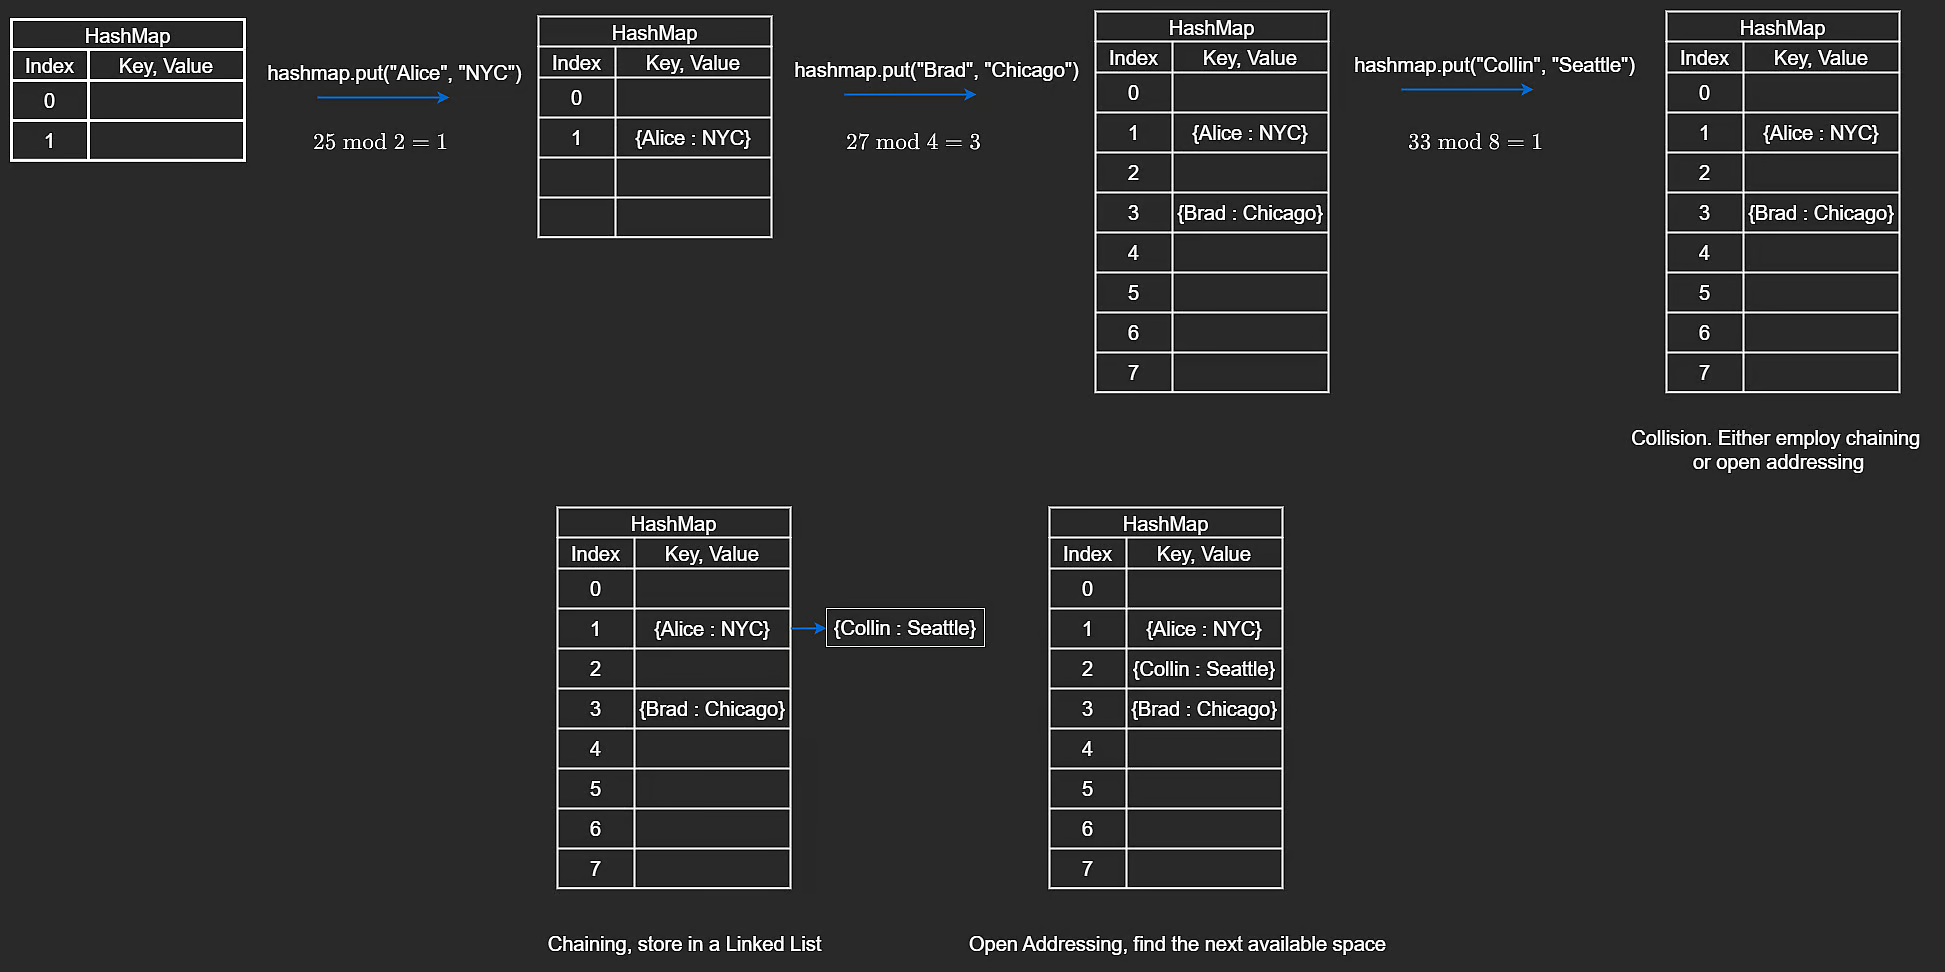


## Code Implementation

The first implementation uses open addressing, where the second one uses chaining.

In [1]:
#this is the key-value pair
class Pair:
    def __init__(self, key, val):
        self.key = key
        self.val = val

class HashMap:
    def __init__(self):
        #size of the hash map actually used
        self.size = 0
        #size of the array under the hood
        self.capacity = 2
        #maps index to the pair object
        self.map = [None, None]
    
    #sums up the ASCII codes of the characters, modulo, and get the index
    def hash(self, key):
        index = 0
        for c in key:
            #get ASCII
            index += ord(c)
        return index % self.capacity
    
    #first need to retrieve the position and check if the value exists in that position. if it does just return that.
    #Otherwise, we can perform open addressing and look for it in the next available index.
    def get(self, key):
        index = self.hash(key)
        
        while self.map[index] != None:
            if self.map[index].key == key:
                return self.map[index].val
            index += 1
            #the below is just incase you overflow then youll restart from index 0
            index = index % self.capacity
        return None
    
    ''' to add to map, first compute the index. then either
    1. index is occupied
    2. index is occupied with the SAME key
    3. index is vacant'''
    def put(self, key, val):
        index = self.hash(key)

        while True:
            #case 3, vacant space
            if self.map[index] == None:
                self.map[index] = Pair(key, val)
                self.size += 1
                #check for resizing
                if self.size >= self.capacity // 2:
                    self.rehash()
                return
            #case 2, just overwrite the value
            elif self.map[index].key == key:
                self.map[index].val = val
                return
            
            #case 1, just then find next avail index
            index += 1
            #prevent overflow
            index = index % self.capacity
    
    #double capacity, copy prev values to new map
    def rehash(self):
        #more optimally, we find the next prime number thats roughly double
        self.capacity = 2 * self.capacity
        newMap = []
        for i in range(self.capacity):
            newMap.append(None)

        oldMap = self.map
        self.map = newMap

        #add in the old key-value pairs
        self.size = 0
        for pair in oldMap:
            #if not none and has stuff in it
            if pair:
                self.put(pair.key, pair.val)

In [ ]:
#this implementation for chaining
class Node:
    def __init__(self, key: int, value: int):
        self.key = key
        self.value = value
        #this is for chaining
        self.next = None

class HashTable:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.size = 0
        self.table = [None] * self.capacity

    def hash_function(self, key: int) -> int:
        return key % self.capacity

    def insert(self, key: int, value: int) -> None:
        index = self.hash_function(key)
        node = self.table[index]

        # If table entry is empty, insert node
        if not node:
            self.table[index] = Node(key, value)
            self.size += 1
        else:
            # If table entry has nodes, check for key update or append to the end
            prev = None
            while node:
                if node.key == key:
                    node.value = value
                    return
                prev, node = node, node.next
            prev.next = Node(key, value)
            self.size += 1

        # Check if resizing is needed
        if self.size / self.capacity >= 0.5:
            self.resize()

    def get(self, key: int) -> int:
        index = self.hash_function(key)
        node = self.table[index]

        while node:
            if node.key == key:
                return node.value
            node = node.next

        return -1

    def remove(self, key: int) -> bool:
        index = self.hash_function(key)
        node = self.table[index]
        prev = None

        while node:
            if node.key == key:
                if prev:
                    prev.next = node.next
                else:
                    self.table[index] = node.next
                self.size -= 1
                return True
            prev, node = node, node.next

        return False

    def getSize(self) -> int:
        return self.size

    def getCapacity(self) -> int:
        return self.capacity

    def resize(self) -> None:
        new_capacity = self.capacity * 2
        new_table = [None] * new_capacity

        for node in self.table:
            while node:
                index = node.key % new_capacity
                if new_table[index] is None:
                    new_table[index] = Node(node.key, node.value)
                else:
                    new_node = new_table[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                node = node.next

        self.capacity = new_capacity
        self.table = new_table


## Time Complexity

| Operation | HashMap | Notes |
|:-|:-|-:|
| Insert | O(1) | |
| Remove | O(1) | |
| Search | O(1) | |

all these operations are $O(1)$ on average (if have good hash function and low n.o. collisions). Worst case is $O(n)$